<a href="https://colab.research.google.com/github/arosha27/00-FundamentsOfPyTorch/blob/main/01_PyTorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
#Pytorch workflow:
what_we_covering = { 1: "Data(prepare and load)",
                     2: "build model",
                     3: "fitting the model to data(training)",
                     4: "making predictions and evaluating a model(inferreence)",
                     5: "saving and reloading the model",
                     6: "putting it all together"
}

In [125]:
import torch
from torch import nn #nn is the building block of pyTorch for building neural networks
import matplotlib.pyplot as plt
print(torch.__version__)


2.6.0+cu124


# Data ( Preparing & Loading )

**Ist Step of PyTorch workflow :** **Data**
Data can be anything like:
text
images
audio
vedios
DNA

Machine Learning is majorly game of two parts:
 - Getting a numerical representation of the input data.
 - building or using pretrained model to learn the patterns from that data representation to produce the output

To showcase this , let's create some known data using the linear regression formula
 - y = wx + b
 x = explainatory variable
 y = dependent variable
 b= bias
 w = weight
  we will use a linear regression formula to make straight line with known parameters.

In [126]:
#Data(preparing and loading)

w = 0.7
b = 0.3

# we want to create a model which can estimate these numbers ( w & b)
X = torch.arange(0 , 1 , 0.02).unsqueeze(dim=1)
y = (w * X) + b

#getting a preview of the X and y by printing first 10 values of both

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [127]:
len(X)  , len(y)
#so we got 50 features and 50 labels for them

(50, 50)

# Splitting the data
Lets split our data into training and testing set :
- 80% data for training
- 20% data for testing

In [128]:
#splitting this data into training and testing sets or splits(one of the most improtant concept in ML in general)
#create a train/test split
#we need 40 amples of X and 40 samples of y (in total 80 samples from training data )

#Training split
train_split= int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
#testing split
X_test , y_test = X[train_split:] , y[train_split:]

#to confirm is the split occur correctly
len(X_train) ,len(y_train) , len(X_test) , len(y_test)


(40, 40, 10, 10)

**Exploring the data** : Visiualize , visiualize , visiulaize


In [129]:
def plot_predictions(
    train_features= X_train,
    train_labels = y_train,
    test_features = X_test,
    test_labels = y_test,
    predictions = None
):
  """ plot the training data , test data and compares predictions """

  plt.figure(figsize=(10,7))

  # Ploting the training data in blue
  plt.scatter(train_features , train_labels , c = 'b', s=12,label="Training Data")

  #Ploting the testing data
  plt.scatter(test_features, test_labels , c= "g" ,s=12,  label = "Testing Data")

##Ploting the predictions
  if predictions is not None:
  #plot the predictions if they are not none
    plt.scatter(test_features , predictions , c = "r" ,s=12, label = "Predictions")

  plt.legend(prop = {"size": 15})


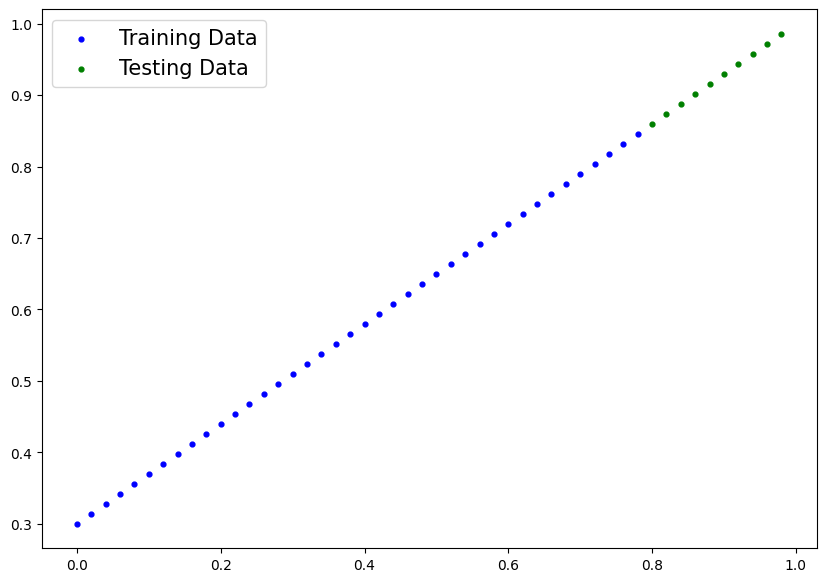

In [130]:
plot_predictions()

In [131]:
#note : red dots are not present as presdictions are not present.

# Model Building

 - 2nd step in PyTorch workflow

**What our model does:**

- The model starts with the random values of weights and biases
- Look at the training data and adjust these weights and biases trying to make them get closer to creating a best fit line

**How does the model do so?**

- Gradient Descent
- Backpropagation

In [181]:
#create a linear regression model class
#our class LinearRegressionModel inherets fron the nn.Model
#almost everthing in pyTorch inherits from nn.Module
# nn Module is the base class for all the neural networks

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,  #start with the random weight and then try to adjust
                                           requires_grad = True, #can this parameter be undated via gradien descent
                                           dtype= torch.float #by default the tensor data type is float32
                                           ))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype= torch.float
                                         ))

    #forward method defines the computation in the model
    #this method will takes a tensor as an input and outputs a tensor

  def forward(self, x: torch.Tensor) -> torch.Tensor: #where x is the input data
    return (self.weight * x) + self.bias


# torch.manual_seed(42)
# model_0 = LinearRegressionModel()

## PyTorch Model Building Essentials:
 1. **torch.nn: **building block of computational graphs (another anme for neural networks)
 2.** torch.nn.Parameter : **what parameters our model should try and learn,often PyTorch layer from torch.nn will set these for usage
 3. **torch.nn.Module :** This is the base class for all the neural networks modules .If you subclass it , you need a override forward()
 4.** torch.optim :** this is where the optimizer in Pytorch lives , which will help with gradient descent and reducing the loss
 5. **def forward() :** in nn.Module subclasses , you must overwrite forward() . This is for the computations
 5. **torch.utils.data.Dataset ** - for complicated datasets
 6. **torch.utils.data.DataLoader** - for complicated datasets






Different essentials at different satges of PyTorch workflow:
 for getting our data ready we use:
  - torchvision.tranforms
  - torch.utils.data.Dataset
  - torch.utils.data.DataLoader
  for building or picking a pre-trained model:
  - pick loss function & optimizer
    - torch.nn
    - torch.nn.Module
    - torchvision.modules
  - optimizer for optimizing model Parameters
    - torch.optim
  for evaluating the model :
    -torchmetrics
  for improvements :
    - torch.utils.tensorboard


*check what 's exactly inside our model*
# Checking the content of the PyTorch Model
 In order to find the parameters or of the content of the model , we use parameters() method


In [182]:
#setting the random_seed value as we have created our parameters using randn method which will create random parameters values everytime we run that cell or call that function.To create reproducibility , we set the manual_seed befor running the function.
torch.manual_seed(42)
#instantiate the class
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [183]:
#List Named Parameters
#for betting clear output to get better idea of which one is for weight and which one is for bias
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

**The entire foundation of deep learning is :**
- starting with some random values
- using gradient descent , back propagation and our data to move these values to ideal values for **weights** and **biases** without knowing what ideal values are

Note :In our case , we know what ideal values are

# Making Prediction on Test Data in PyTorch inference Mode
 - we use the PyTorch inference mode because under this mode the model will just predict the y-test based on x-train intead of doing backpropagation for finding optimal parameters



In [184]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

#another alternative of making th prediction
# with torch.no_grad():
#   y_preds = model_0(X_text)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

**Note :**The puprose of doing the predictions under the torch.inference_mode() is to make the testing process or predictions faster by stoping all other backgorund processes like backpropagation and just focusing on making predictions

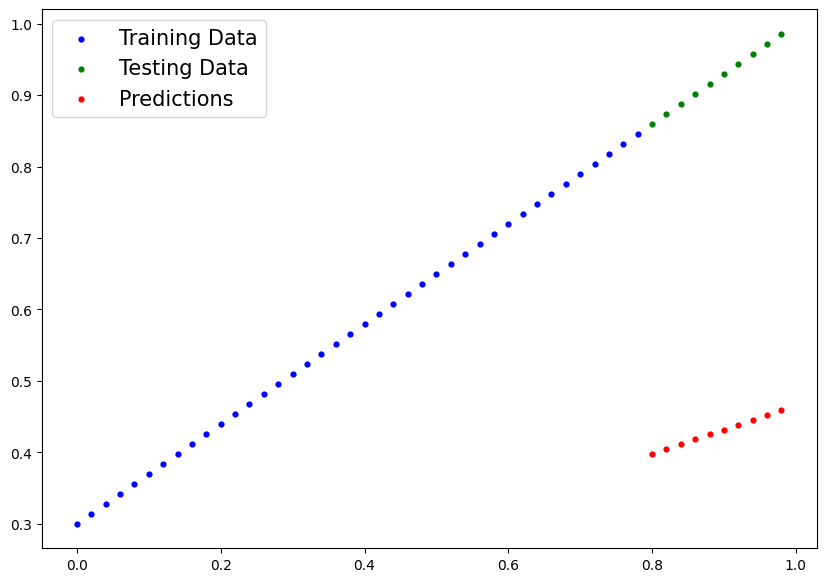

In [185]:
#check how far model predictions are from the actual values (ground truth) i.e y_test by plotting to get a better idea of it

plot_predictions(predictions= y_preds)

Note : The scatter plot shows that we are far from the actual values . thus we need t adjust the weights and biases that way to get closer to actual green dots in the graph


#Model Training

The whole idea of model training is fro a model to move from some unknown parameters to known or ideal parameters

OR

to move from poor representation of data to good represenataton of data

- In order to measure how wrong or poor our model predictions are , we use a loss function
- it is also known as cost function or creterion in some area .
- it is difference between the actual values and predicted values,lower is better
_ torch.nn provides a lot of loss functions

**Things we need to train our model:**
1.** loss function :**actual vlaues - predicted valuesn
2.** optimizer :** based on loss , it adjusts the parameters (weights and biases) and will imporve the loss


## Loss Function and Optimizer

In [186]:
loss_fn = nn.L1Loss() # L1Loss is the MAE in pytorch
optimizer = torch.optim.SGD(params = model_0.parameters(),
                         lr = 0.01)
#lr is the learning rate , can say it is the most important hyperparameter .It controls the speed of updating or adjusting the parameters


Q.Which loss function and optimizers should be used ?

A. This is problem specific .
- For Regression problems , we use nn.
- L1Loss and torch.optim.SGD etc
For classification , we use nn.BCELoss

Parameters VS Hyperparameters
- parameter is the value the model set
- hyperparameter is the value we data scientists set

## Building a Training Loop(Testing loop) In PyTorch

In training loop , we need to do a few things:
0. Loop through the data
1. Forward Propagation : Do a forward pass .ie move from input layers to output layers via forward() function which is used to calculate the predictions
2. calculte the loss via loss function i.e difference between actual output and the prediction .In our case (y_preds - y_test)
3. Optimizer zero grad
4. Backward Propagation: Move in backward direction from output layer and find the gradient for each parameter based on loss calculated.
5. Optimize the parameter values to minimize the loss (gradient descent)


**Note: some important concepts:**

gradient is the slop i.e change in X by change in y.Understand it by keeping the visiual of a hill . At the very top of the hill , the gradient is too high , we need to move downward from the steep slop utill steepness becomes 0 or near zero , and the loss is the vertical distance from the steep slop to the ground or earth 's surpase . As gradient decreases , the loss also decreases.


In [237]:
 torch.manual_seed(42)

 epocs = 100 # epocs is the number of times our model is traversing over our data
#0. loop over the data

for epoc in range(epocs):

  #1.Training The Model
  # the train mode in PyTorch sets all the parameters that gradients requires

  model_0.train()
  #1.Do a foward pass
  y_pred = model_0(X_train)

  #1.Find Loss
  loss= loss_fn(y_pred,y_train)
  print(f"lose : {loss}")

  #3.optimizer zero grad i.e setting the optimzer 0 every time entering in the loop to avoids the accomulates which might affect the new gradiends values
  optimizer.zero_grad()

  #4.back propagation to find the gradients for each parameter
  loss.backward()

  #5.step the optimizer i.e calculate the next weight and bias value based on loss calculated
  optimizer.step()


  model_0.eval() #turn off gradient tracking


lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lose : 0.008932482451200485
lose : 0.0025885067880153656
lo

Before Traing loop :

 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [238]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [241]:
#Testing to check if our model training is good or not


with torch.inference_mode():
  y_preds = model_0(X_test)


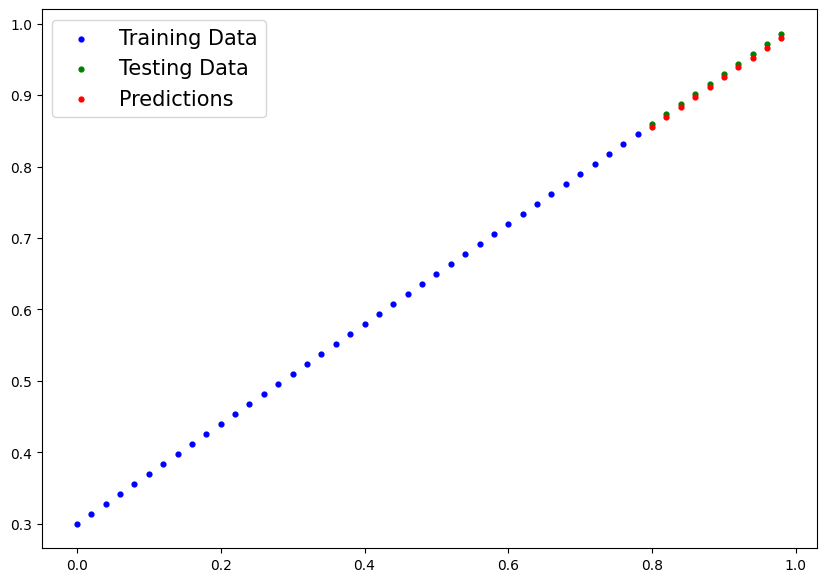

In [242]:
plot_predictions(predictions = y_preds)